In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

dataset = pd.read_csv('sgemm_product.csv')


dataset.isnull().sum()

columns = ['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']
df = dataset[columns].to_numpy()
a= df.mean(axis = 1)
#data.head()
datax = dataset.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis = 1)
#datax.head()
datax['runtime'] = a
datax.head()

#datax200 = datax.sample(n=100000,replace=True)
#datax200
X_SVM = datax.iloc[:,0:13].values    
Y_SVM = datax.iloc[:,14:15].values

In [2]:
# Assigning 0s and 1s based on Median Average Runtime
Y_SVM = np.where(Y_SVM<= 69.79,0,1)
#Y_SVM = pd.DataFrame(Y_SVM)

from sklearn.preprocessing import StandardScaler
dataset_sc_LogReg = StandardScaler()
X_SVM = dataset_sc_LogReg.fit_transform(X_SVM)
#Y_SVM = dataset_sc_LogReg.fit_transform(Y_SVM)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SVM, Y_SVM, test_size = 0.25, random_state = 0)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SVM, Y_SVM, test_size = 0.25, random_state = 0)


In [6]:
from sklearn.tree import DecisionTreeClassifier
depth = np.arange(5,25,1)
acc_train = []
acc_test = []
for i in depth:   
    DTClas = DecisionTreeClassifier(criterion= "entropy" ,max_depth= i,  random_state= 0 )
    DTClas.fit(X_train , y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))

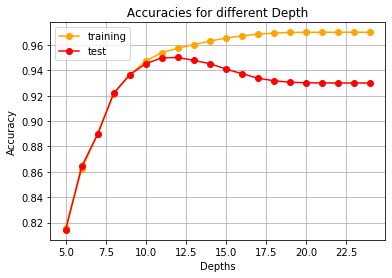

In [7]:
plt.plot(depth,acc_train,marker='o',markersize=6,color='orange',label='training')
plt.plot(depth,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Depth ")
plt.xlabel("Depths")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [8]:
depth = np.arange(5,15,1) #15
acc_train = []
acc_test = []
for i in depth:   
    DTClas = DecisionTreeClassifier(criterion= "entropy" ,max_depth= i,random_state= 0 )
    DTClas.fit(X_train , y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))

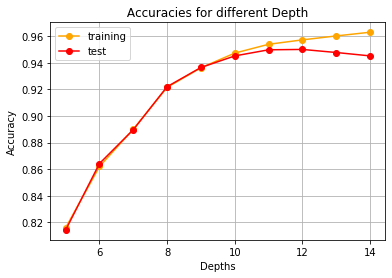

In [9]:
plt.plot(depth,acc_train,marker='o',markersize=6,color='orange',label='training')
plt.plot(depth,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Depth ")
plt.xlabel("Depths")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
depth = np.arange(5,25,1)
acc_train = []
acc_test = []
for i in depth:   
    DTClas = DecisionTreeClassifier(criterion= "entropy" ,max_depth= i, min_samples_leaf= 20,  random_state= 0 )
    DTClas.fit(X_train , y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))

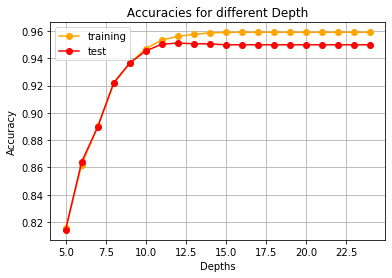

In [11]:
plt.plot(depth,acc_train,marker='o',markersize=6,color='orange',label='training')
plt.plot(depth,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Depth ")
plt.xlabel("Depths")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

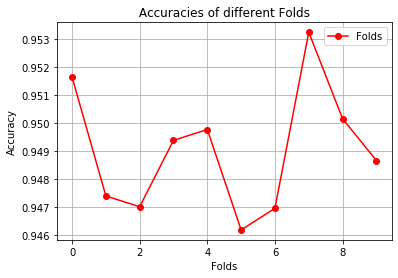

In [12]:
from sklearn.model_selection import cross_val_score
accuracies_dt_1 = cross_val_score(estimator = DTClas, X = X_train, y = y_train, cv = 10)
mean_acc_dt_1 = accuracies_dt_1.mean()

# Plotting the mean accuracies found from cross validtion and test set accuracy
plt.plot(np.arange(0,10,1),accuracies_dt_1,marker = 'o' , markersize = 6 , color = 'red',label='Folds')
plt.title(" Accuracies of different Folds ")
plt.xlabel("Folds")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
DTClas = DecisionTreeClassifier(criterion= "entropy" ,max_depth= 5, min_samples_leaf= 20,  random_state= 0 )
DTClas.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

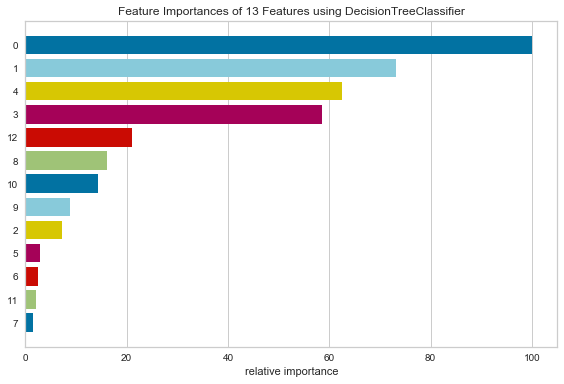

In [14]:
from yellowbrick.model_selection import FeatureImportances
DTClas = DecisionTreeClassifier(criterion= "entropy" , min_samples_leaf= 20,  random_state= 0 )
DTClas.fit(X_train , y_train)
viz = FeatureImportances(DTClas)
viz.fit(X_train, y_train)
viz.show()

In [22]:
from xgboost import XGBClassifier
depth = np.arange(5,25,1)
acc_train2 = []
acc_test2 = []
for i in depth:   
    DTClas = XGBClassifier( max_depth= i ,  random_state= 0 )
    DTClas.fit(X_train , y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train2.append(accuracy_score(y_train,y_pred_train))
    acc_test2.append(accuracy_score(y_test,y_pred_test))


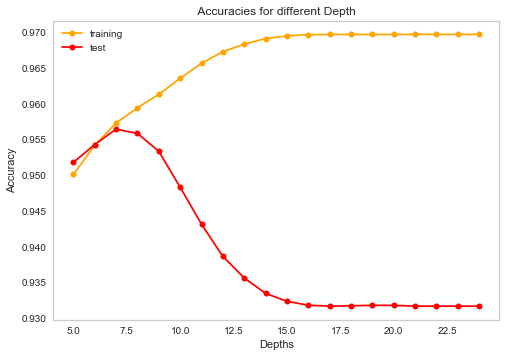

In [23]:
plt.plot(depth,acc_train2,marker='o',markersize=6,color='orange',label='training')
plt.plot(depth,acc_test2,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Depth ")
plt.xlabel("Depths")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
boosting_level = np.arange(1,100,15)
acc_train = []
acc_test = []
for i in boosting_level:   
    DTClas = XGBClassifier( n_estimators = i, random_state= 0 )
    DTClas.fit(X_train, y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train.append(accuracy_score(y_train,y_pred_train))
    acc_test.append(accuracy_score(y_test,y_pred_test))


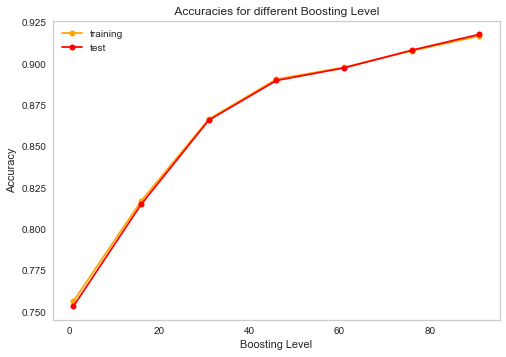

In [20]:
plt.plot(boosting_level,acc_train,marker='o',markersize=6,color='orange',label='training')
plt.plot(boosting_level,acc_test,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Boosting Level ")
plt.xlabel("Boosting Level")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()  

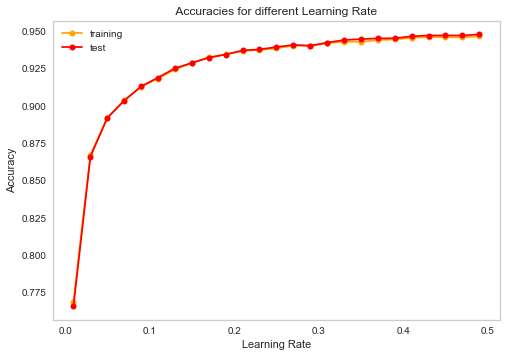

In [25]:
learning_rate = np.arange(0.01,0.5,0.02)
acc_train3 = []
acc_test3 = []
for i in learning_rate:   
    DTClas = XGBClassifier( learning_rate = i, random_state= 0 )
    DTClas.fit(X_train , y_train)
    y_pred_train = DTClas.predict(X_train)
    y_pred_test = DTClas.predict(X_test)
    acc_train3.append(accuracy_score(y_train,y_pred_train))
    acc_test3.append(accuracy_score(y_test,y_pred_test))

# Plotting learning rate versus the accuracies of train and test set
plt.plot(learning_rate,acc_train3,marker='o',markersize=6,color='orange',label='training')
plt.plot(learning_rate,acc_test3,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Learning Rate ")
plt.xlabel("Learning Rate")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()